<a href="https://colab.research.google.com/github/Asmitha267/NGOConnect/blob/main/crime_against_women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("viridis")

from google.colab import files
uploaded = files.upload()

df = pd.read_excel("crime_against_women_1000_entries.xlsx")

print(" Dataset Loaded Successfully!")
print("Shape of Data:", df.shape)
df.head()


Saving crime_against_women_1000_entries.xlsx to crime_against_women_1000_entries.xlsx
✅ Dataset Loaded Successfully!
Shape of Data: (1100, 15)


,State/UT,District,Year,Month,Crime_Type,Cases_Reported,Victims,Arrests_Made,Convictions,Pending_Cases,Urban_Rural,Population,Police_Stations,FIR_Registered,Remarks
0,Rajasthan,Bhopal,2023,July,Stalking,836,853,583,NaN,178.0,Rural,7560577,41,Yes,Data incomplete
1,Delhi,Bhopal,2024,September,Murder,488,481,340,NaN,NaN,Rural,7669917,135,Yes,Stable trend
2,Tamil Nadu,Amritsar,2025,January,Assault,267,257,196,NaN,NaN,Urban,3065408,90,Yes,Serious increase
3,Delhi,Chennai,2025,August,Trafficking,247,246,232,149.0,216.0,Rural,10557272,59,Yes,Duplicate entry
4,Madhya Pradesh,Pune,2023,January,Murder,331,341,191,126.0,68.0,Urban,2237155,177,No,NaN


 Missing Values per Column:
State/UT             0
District             0
Year                 0
Month                0
Crime_Type           0
Cases_Reported       0
Victims              0
Arrests_Made         0
Convictions        543
Pending_Cases      558
Urban_Rural          0
Population           0
Police_Stations      0
FIR_Registered       0
Remarks            164
dtype: int64

Missing Value Percentage (%):
State/UT            0.000000
District            0.000000
Year                0.000000
Month               0.000000
Crime_Type          0.000000
Cases_Reported      0.000000
Victims             0.000000
Arrests_Made        0.000000
Convictions        49.363636
Pending_Cases      50.727273
Urban_Rural         0.000000
Population          0.000000
Police_Stations     0.000000
FIR_Registered      0.000000
Remarks            14.909091
dtype: float64


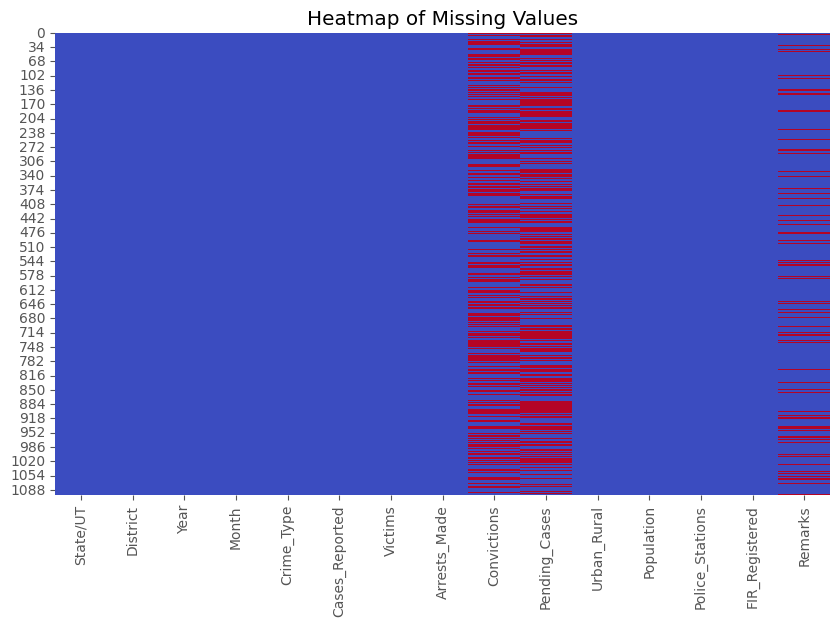

In [ ]:
print(" Missing Values per Column:")
print(df.isnull().sum())

missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Value Percentage (%):")
print(missing_percent)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Heatmap of Missing Values")
plt.show()


In [ ]:
print(" Duplicate Rows:", df.duplicated().sum())

df[df.duplicated()].head()

 Duplicate Rows: 100


,State/UT,District,Year,Month,Crime_Type,Cases_Reported,Victims,Arrests_Made,Convictions,Pending_Cases,Urban_Rural,Population,Police_Stations,FIR_Registered,Remarks
83,Tamil Nadu,Chennai,2023,October,Acid Attack,841,842,441,315.0,271.0,Urban,1162765,180,No,Serious increase
106,Delhi,Patna,2023,August,Domestic Violence,741,757,429,NaN,27.0,Urban,2331530,47,No,Duplicate entry
117,Tamil Nadu,Kolkata,2024,October,Rape,803,798,442,NaN,78.0,Urban,10546905,196,Yes,Stable trend
130,West Bengal,Chennai,2025,February,Domestic Violence,388,378,354,NaN,NaN,Urban,5783196,172,Yes,Duplicate entry
134,Karnataka,Bhopal,2024,November,Stalking,703,707,360,253.0,NaN,Rural,11091504,89,Yes,-


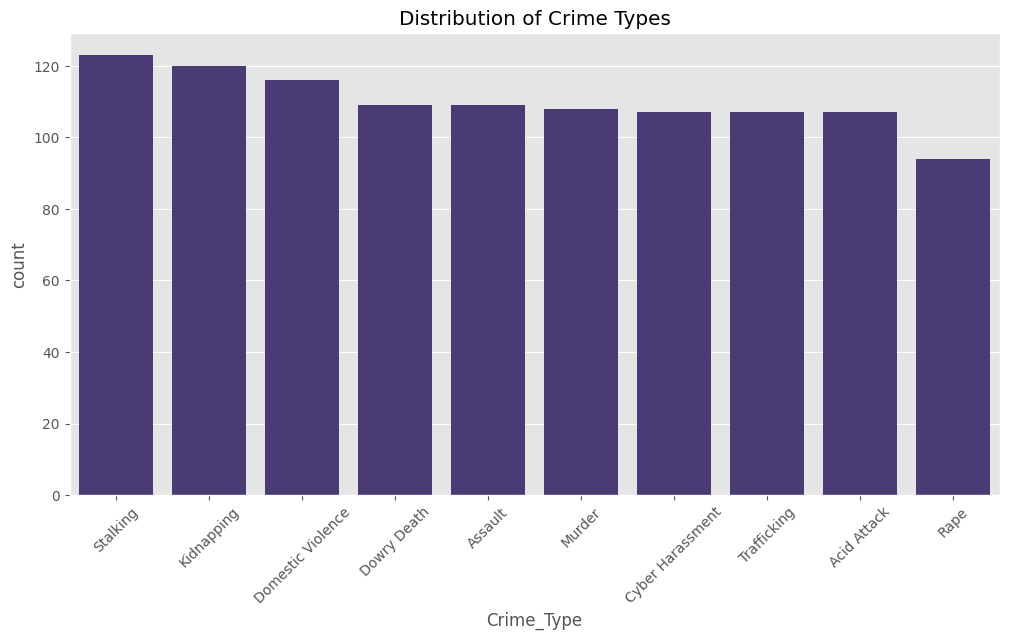

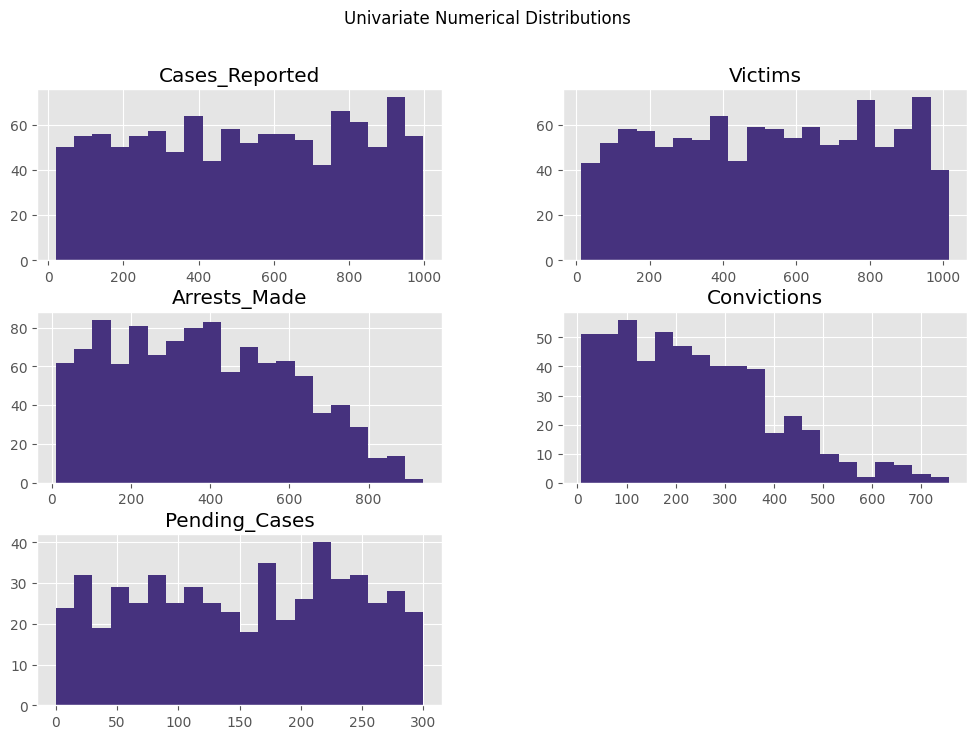

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Crime_Type', order=df['Crime_Type'].value_counts().index)
plt.title("Distribution of Crime Types")
plt.xticks(rotation=45)
plt.show()

num_cols = ['Cases_Reported', 'Victims', 'Arrests_Made', 'Convictions', 'Pending_Cases']
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Univariate Numerical Distributions")
plt.show()


/tmp/ipython-input-2719143570.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Year', y='Cases_Reported', hue='Urban_Rural', ci=None)


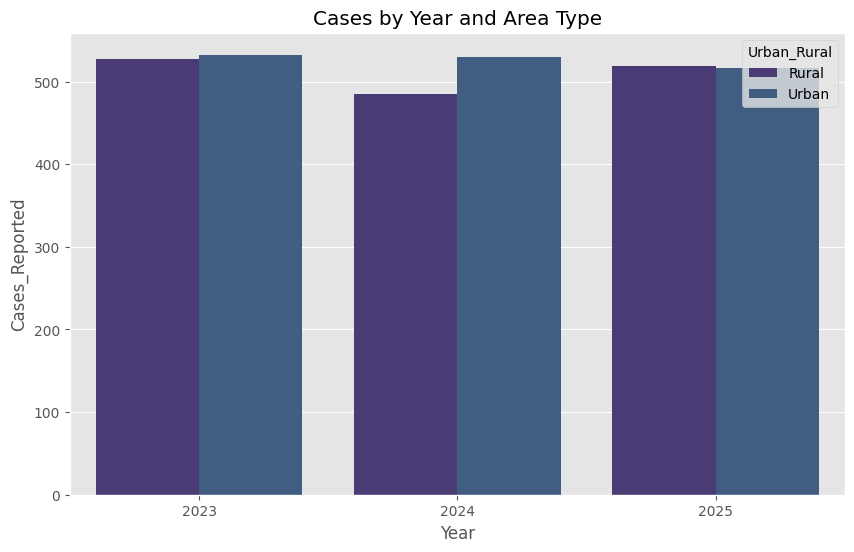

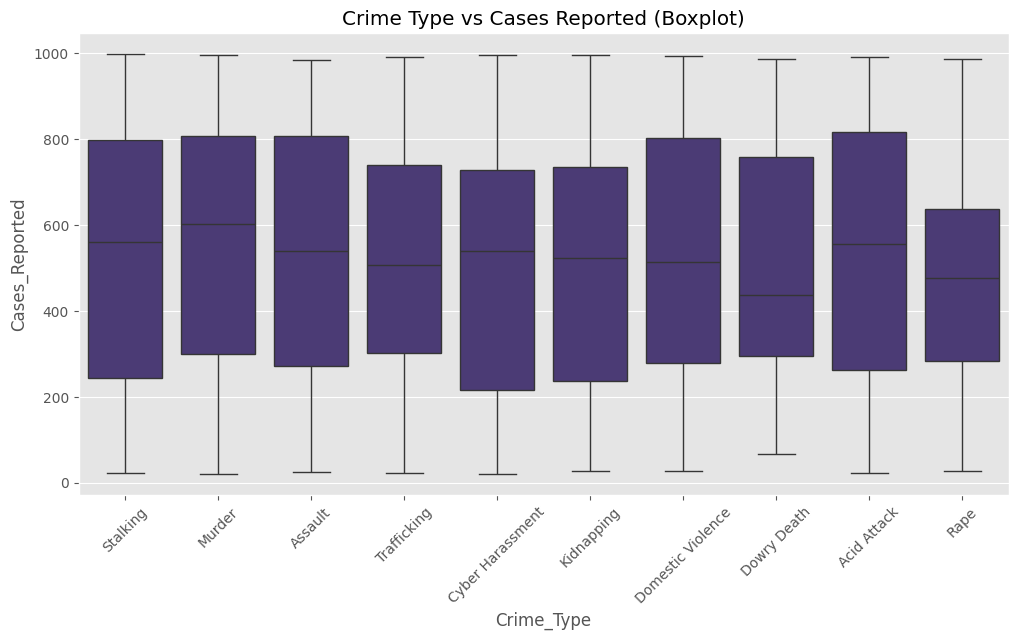

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Year', y='Cases_Reported', hue='Urban_Rural', ci=None)
plt.title("Cases by Year and Area Type")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Crime_Type', y='Cases_Reported')
plt.title("Crime Type vs Cases Reported (Boxplot)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
num_cols = ['Cases_Reported', 'Victims', 'Arrests_Made', 'Convictions', 'Pending_Cases']

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

print(" Outliers Detected in Each Column:")
print(outliers)


 Outliers Detected in Each Column:
Cases_Reported    0
Victims           0
Arrests_Made      0
Convictions       5
Pending_Cases     0
dtype: int64


 Unique States: 13
 Unique Districts: 13
 Unique Crime Types: 10


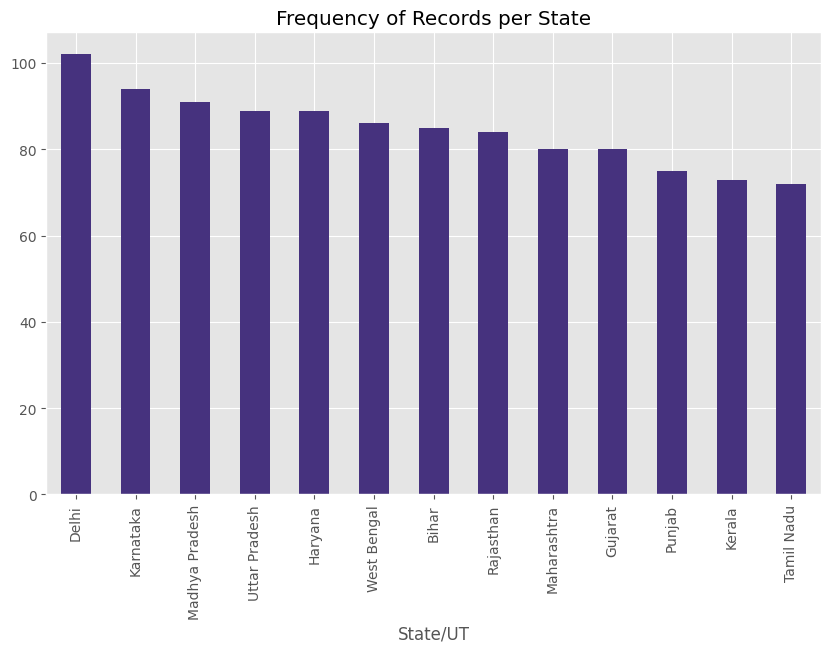

In [ ]:
print(" Unique States:", df['State/UT'].nunique())
print(" Unique Districts:", df['District'].nunique())
print(" Unique Crime Types:", df['Crime_Type'].nunique())

plt.figure(figsize=(10,6))
df['State/UT'].value_counts().plot(kind='bar')
plt.title("Frequency of Records per State")
plt.show()


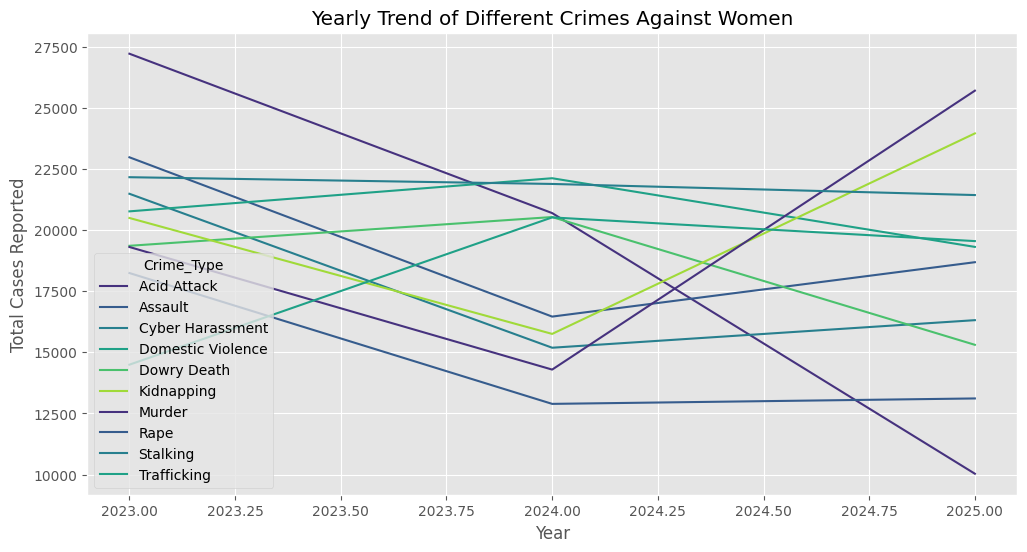

In [ ]:
trend = df.groupby(['Year', 'Crime_Type'])['Cases_Reported'].sum().unstack().fillna(0)
trend.plot(figsize=(12,6))
plt.title("Yearly Trend of Different Crimes Against Women")
plt.ylabel("Total Cases Reported")
plt.show()


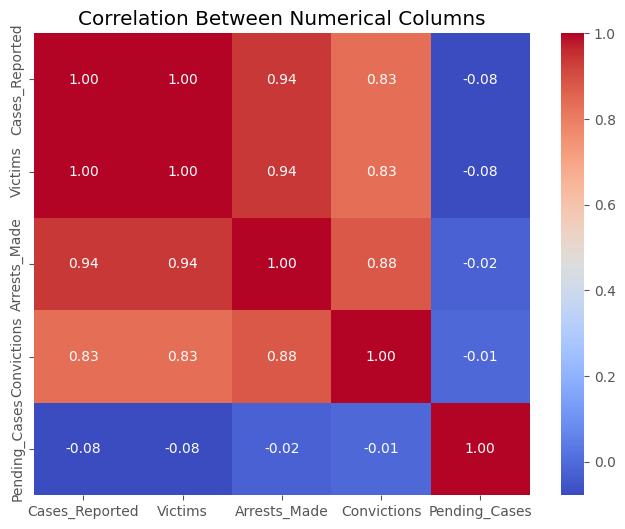


 Key Insights:
- Strong positive correlation likely between Cases_Reported, Victims, and Arrests_Made.
- Convictions depend on Arrests and Pending Cases.
- Urban regions may report higher case numbers.
- Outliers may indicate unusual reporting or data duplication.


In [ ]:
num_cols = ['Cases_Reported', 'Victims', 'Arrests_Made', 'Convictions', 'Pending_Cases']

corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Columns")
plt.show()

print("\n Key Insights:")
print("- Strong positive correlation likely between Cases_Reported, Victims, and Arrests_Made.")
print("- Convictions depend on Arrests and Pending Cases.")
print("- Urban regions may report higher case numbers.")
print("- Outliers may indicate unusual reporting or data duplication.")
